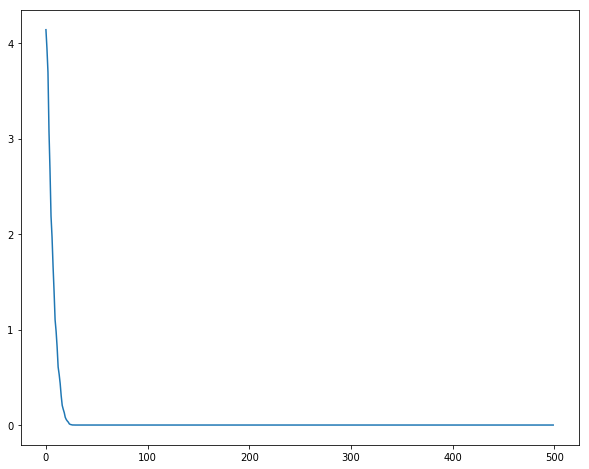

In [2]:
def fun(x):
    result=100*(x[0,0]**2-x[1,0])**2+(x[0,0]-1)**2
    return result
def gfun(x):
    result=zeros((2,1))
    result[0,0]=400*(x[0,0]**2-x[1,0])*x[0,0]+2*(x[0,0]-1)
    result[1,0]=-200*(x[0,0]**2-x[1,0])
    return result
##
from numpy import *
##x0为列
def DFP(fun,gfun,x0):
    result=[]
    iter=0
    max_iter=500
    rho=0.55
    sigma=0.4
    num_dim=shape(x0)[0]
    Gk=eye(num_dim)
    while(iter<max_iter):
        gk=mat(gfun(x0))
        pk=-mat(Gk)*gk#使用矩阵乘法
        m=0
        mk=0
        while(m<20):
            newf=fun(x0+rho**m*pk)
            oldf=fun(x0)
            if(newf<oldf+sigma*rho**m*gk.T*pk):
                mk=m
                break
            m=m+1
            
        #DFP校正
        x=x0+rho**m*pk
        sk=x-x0
        yk=gfun(x)-gk #误差
        if(sk.T*yk>0):
            Gk=Gk+(sk*sk.T)/(sk.T*yk)-(Gk*yk*yk.T*Gk)/(yk.T*Gk*yk)
        iter=iter+1
        x0=x
        result.append(fun(x0))
    return result 
import matplotlib.pyplot as plt
from numpy import *
x0=mat([[-1.2],[1]])
result1=DFP(fun,gfun,x0)
n=len(result1)
fig,ax=plt.subplots(figsize=(10,8))
x=arange(0,n,1)
y=result1
ax.plot(x,y)
plt.show()